In [460]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Nishankur\\Downloads\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


   ## Data Visualization 

In [5]:
df.drop("RowNumber",axis=1,inplace=True)

In [8]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [381]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,random
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501616
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.289479
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000352
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.252430
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.502785
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.752229
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,0.999947


<AxesSubplot:xlabel='Exited', ylabel='count'>

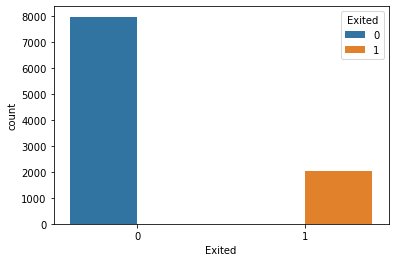

In [399]:
sns.countplot(x='Exited',data=df, hue='Exited')

We can see that the sample size of retained customers is much higher than that of the exited customers. Hence, we will mostly focus on the exiting customers for analysis. Later, for predictions we will use resampling methods to get equal proportion of customer data, so that we have a better model.

Also, it is unclear whethter the exiting customers stopped using a service or quit the bank itself, since some of them still have balance in their accounts. Hence, we will assume that the customer has either exited the bank or a product.

In [18]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [400]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,random
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.660598
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.879142
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.374596
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.756826
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.703070
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.317235
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.128173
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.953675
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.279276


In [28]:
#import seaborn
import seaborn as sns

In [401]:
places = df['Geography'].unique()
gender =df['Gender'].unique()
gender 

array(['Female', 'Male'], dtype=object)

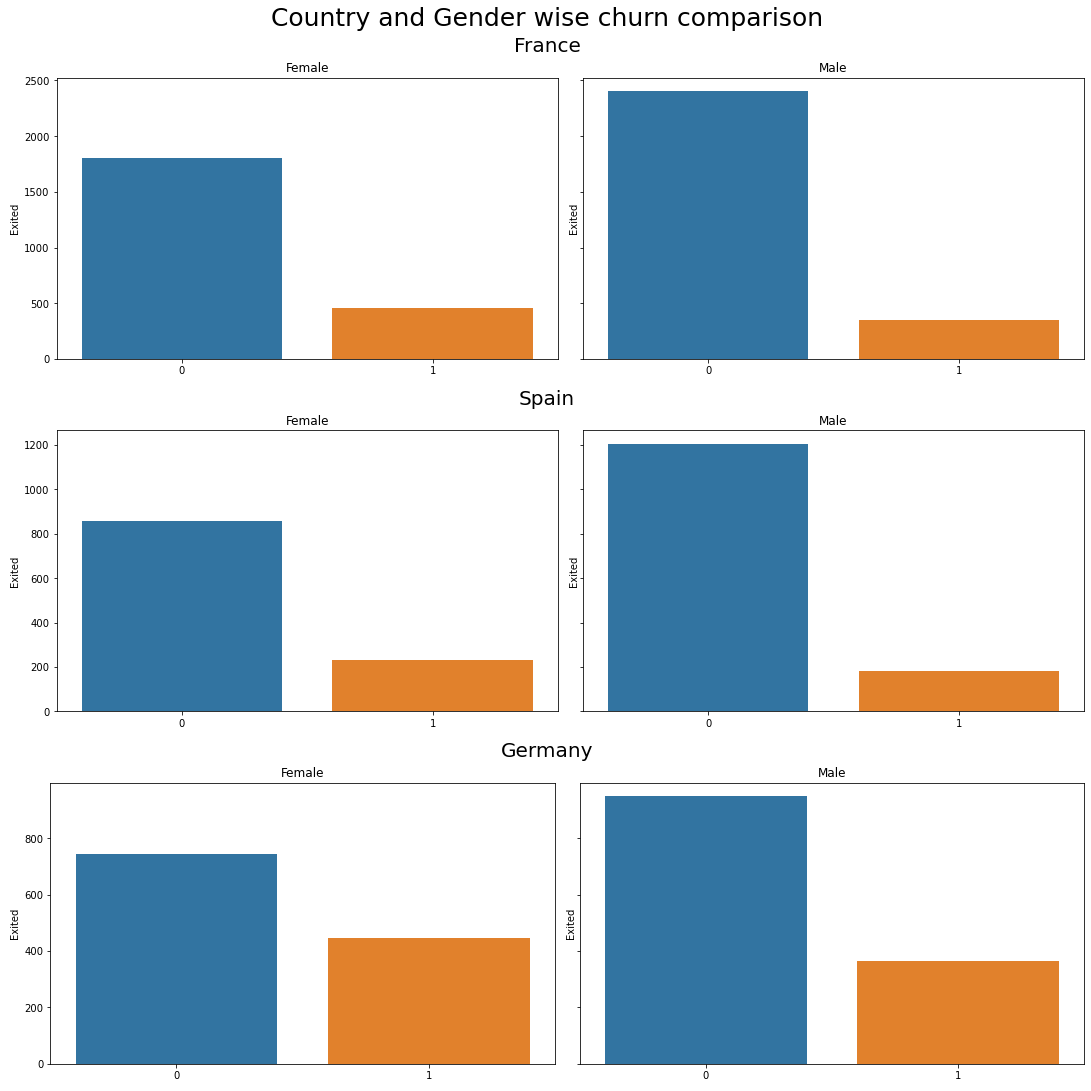

In [403]:
#Country wise churn count
fig = plt.figure(constrained_layout=True)
fig.suptitle('Country and Gender wise churn comparison',size =25)
fig.set_figheight(15)
fig.set_figwidth(15)
# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
for row, subfig in enumerate(subfigs):
    country = df[df['Geography']==places[row]]
    subfig.suptitle(f'{places[row]}',size = 20)
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2,sharex=True,sharey=True)
    for col, ax in enumerate(axs):
        co = country[country['Gender']==gender[col]]['Exited'].value_counts().to_frame()
        sns.barplot(data=co,x=co.index,y='Exited',ax=ax)
        ax.set_title(f'{gender[col]}')
plt.show()

In [404]:
group = df.groupby('Geography')
#France Male to Female ratio:
g = group['Gender'].value_counts() 
g

Geography  Gender
France     Male      2753
           Female    2261
Germany    Male      1316
           Female    1193
Spain      Male      1388
           Female    1089
Name: Gender, dtype: int64

## Male vs. Female Customers

1. The number of male customers is greater than the number of female customers in all the listed countries.
2. From the graph it can be seen that, the number of female customers exiting a service or the bank, is greater than the number of male customers.
3. On the contrary, the number of retained male customers is greater than the number of female customers.

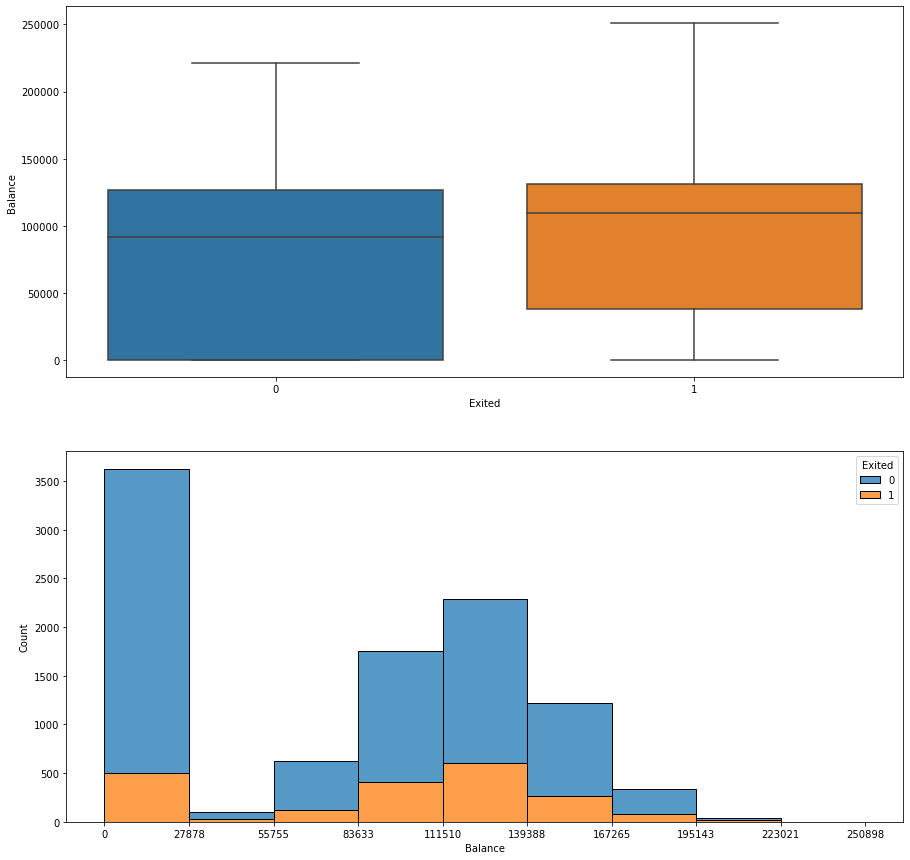

In [405]:
# Exit rate depending on Balance
fig,(ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.boxplot(data=df,x='Exited',y='Balance',ax=ax1)
bins = np.linspace(df.Balance.min(), df.Balance.max(), 10)
sns.histplot(data=df,x = 'Balance' ,bins=bins, hue='Exited',ax=ax2,multiple="stack").set_xticks(bins)

1. The distribution of people likely to exit a service or the bank is more scattered. 
2. Also, number of people likely to exit a service or the bank shows a rising trend in the range, 28000-139000, which then starts falling off again.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

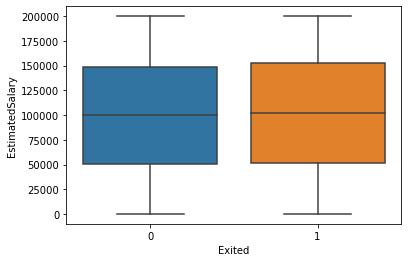

In [411]:
# Exit rate depending on EstimatedSalary
sns.boxplot(data=df,x='Exited',y='EstimatedSalary')

 1. The distribution of people based on their estimated salary seems to be the same. So, the salary does'nt seem to impact whether a person will leave the bank or not. 

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

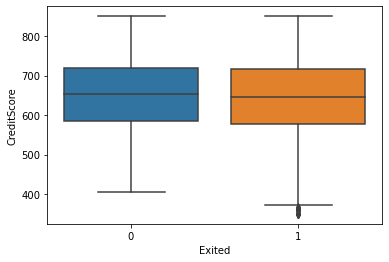

In [412]:
# Exit rate depending on Credit score
sns.boxplot(data = df, x = 'Exited', y = 'CreditScore' )

1. The distribution of people based on their credit score seems to be the same, with a few people with low credit scores exiting a service or the bank. So, the salary doesn't seem to have much impact on whether a person will leave the bank or not. 

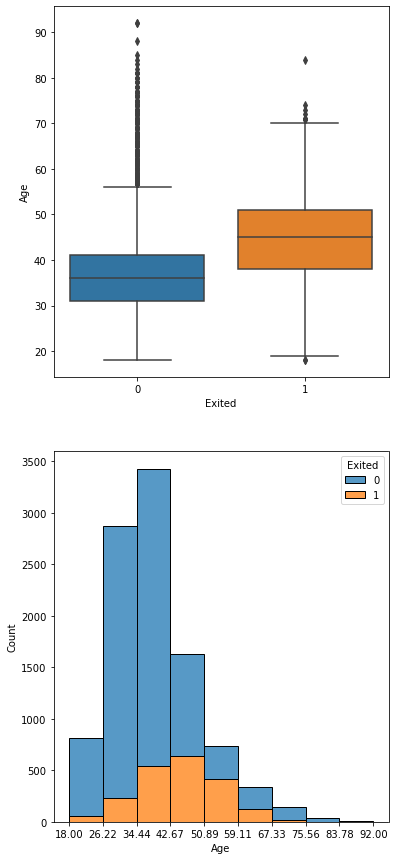

In [427]:
# Exit rate depending on Age
fig,(ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(15)
sns.boxplot(data = df, x = 'Exited', y = 'Age',ax=ax1)
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
sns.histplot(data=df,x = 'Age' ,bins=bins, hue='Exited',ax=ax2,multiple="stack").set_xticks(bins)



 1. Graph shows a rising trend for people who are more likely to exit the bank or a service in the age group of 18-50 yrs, which then starts falling off gradually.

In [414]:
# Exit rate depending on Tenure
tenure  = df['Tenure'].unique()
tenure

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

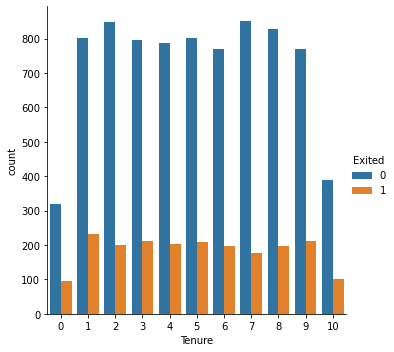

In [415]:
ten = df.groupby('Tenure')['Exited'].value_counts().to_frame()
ten.rename(columns={'Exited':'count'},inplace=True)
ten.reset_index(inplace=True)
sns.catplot(kind = 'bar', data=ten,x ='Tenure',y='count',hue='Exited')



1. The exit rate doesn't seem to depend much on tenure. 

In [416]:
# Exit rate depending on number of products
pro  = df['NumOfProducts'].unique()
pro

array([1, 3, 2, 4], dtype=int64)

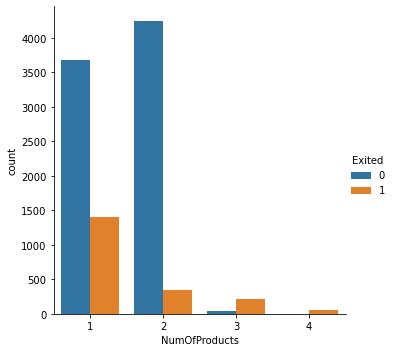

In [417]:
p = df.groupby('NumOfProducts')['Exited'].value_counts().to_frame()
p.rename(columns={'Exited':'count'},inplace=True)
p.reset_index(inplace=True)
sns.catplot(kind = 'bar', data=p,x ='NumOfProducts',y='count',hue='Exited')


1. The more the number of products a person owns the less likely they are to exit a service or the bank.

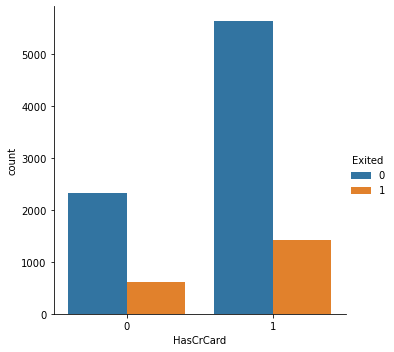

In [418]:
# Exit rate depending on whether a person has credit card or not
card = df.groupby('HasCrCard')['Exited'].value_counts().to_frame()
card.rename(columns={'Exited':'count'},inplace=True)
card.reset_index(inplace=True)
sns.catplot(kind = 'bar', data=card,x ='HasCrCard',y='count',hue='Exited')


1. People owning a credit card are less likely to exit a service or the bank.

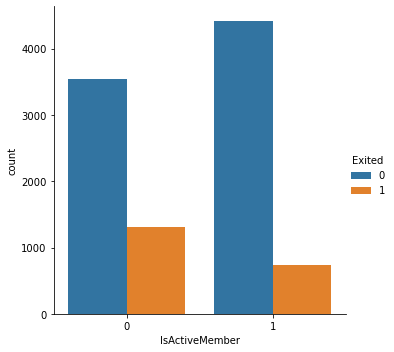

In [419]:
# Exit rate depending on whether a person is an active member
active = df.groupby('IsActiveMember')['Exited'].value_counts().to_frame()
active.rename(columns={'Exited':'count'},inplace=True)
active.reset_index(inplace=True)
sns.catplot(kind = 'bar', data=active,x ='IsActiveMember',y='count',hue='Exited')

1. Active members card are less likely to exit a service or the bank.

## Data Transformation and Pre-processing 

In [457]:
#Feature selection and one hot encoding
features = df[['Geography','Gender','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember']]
features = features.replace({'Male':1,'Female':0})

In [458]:
features = pd.concat([features,pd.get_dummies(df['Geography'])], axis=1)
features.drop(['Geography'], axis = 1,inplace=True)
features.head()


,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,France,Germany,Spain
0,0,42,0.00,1,1,1,1,0,0
1,0,41,83807.86,1,0,1,0,0,1
2,0,42,159660.80,3,1,0,1,0,0
3,0,39,0.00,2,0,0,1,0,0
4,0,43,125510.82,1,1,1,0,0,1


In [462]:
#Standardization
std = preprocessing.StandardScaler()
X = std.fit_transform(features)
X

array([[-1.09598752,  0.29351742, -1.22584767, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [-1.09598752,  0.19816383,  0.11735002, ..., -1.00280393,
        -0.57873591,  1.74273971],
       [-1.09598752,  0.29351742,  1.33305335, ...,  0.99720391,
        -0.57873591, -0.57380915],
       ...,
       [-1.09598752, -0.27860412, -1.22584767, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [ 0.91241915,  0.29351742, -0.02260751, ..., -1.00280393,
         1.72790383, -0.57380915],
       [-1.09598752, -1.04143285,  0.85996499, ...,  0.99720391,
        -0.57873591, -0.57380915]])

In [583]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [464]:
from sklearn.model_selection import train_test_split

In [584]:
x_tr,x_tst,y_tr,y_tst = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [585]:
x_tr.shape, y_tr.shape,x_tst.shape, y_tst.shape,

((8000, 9), (8000,), (2000, 9), (2000,))

# Model imports and fitting

In [494]:
!pip install xgboost

In [524]:
#Import the various models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [590]:
#Model selection
def best_model(clf):
    print(clf.best_score_)    
    print(clf.best_params_)
    print(clf.best_estimator_)

In [601]:
#Classification accuracy
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Logistic Regression

In [540]:
# Fit logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001],'solver':['liblinear', 'sag', 'saga'],'intercept_scaling':[1]}
log_lin= GridSearchCV(LogisticRegression(class_weight='balanced'),param_grid, cv=10, refit=True, verbose=0)
log_lin.fit(x_tr, y_tr)
best_model(log_lin)

0.707375
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}
LogisticRegression(C=50, class_weight='balanced', max_iter=250, solver='sag')


In [541]:
print(classification_report(y_tst,log_lin.best_estimator_.predict(x_tst)))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1607
           1       0.39      0.73      0.51       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



In [543]:
print(classification_report(y_tst,log_pol.best_estimator_.predict(x_tst)))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1607
           1       0.39      0.73      0.51       393

    accuracy                           0.73      2000
   macro avg       0.65      0.73      0.66      2000
weighted avg       0.81      0.72      0.75      2000



## SVM

In [546]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['sigmoid']}
SVM_gcv = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3, refit=True, verbose=0)
SVM_gcv.fit(x_tr,y_tr)
best_model(SVM_gcv)

0.7215010070477875
{'C': 0.5, 'gamma': 0.001, 'kernel': 'sigmoid', 'probability': True}
SVC(C=0.5, class_weight='balanced', gamma=0.001, kernel='sigmoid',
    probability=True)


In [548]:
print(classification_report(y_tst,SVM_gcv.best_estimator_.predict(x_tst)))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1607
           1       0.40      0.69      0.50       393

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.73      0.76      2000



In [550]:
# Fit SVM with Polynomial Kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2] }
SVM_pol = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_pol.fit(x_tr,y_tr)
best_model(SVM_pol)

0.818999744311781
{'C': 50, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=50, degree=2, gamma=0.1, kernel='poly', probability=True)


In [551]:
print(classification_report(y_tst,SVM_pol.best_estimator_.predict(x_tst)))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1607
           1       0.78      0.14      0.23       393

    accuracy                           0.82      2000
   macro avg       0.80      0.56      0.57      2000
weighted avg       0.82      0.82      0.77      2000



## Random Forest

In [552]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RF_gcv = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5, refit=True, verbose=0)
RF_gcv.fit(x_tr,y_tr)
best_model(RF_gcv)

0.8225
{'max_depth': 8, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=2,
                       min_samples_split=5, n_estimators=50)


In [536]:
print(classification_report(y_tst,RF_gcv.best_estimator_.predict(x_tst)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1607
           1       0.55      0.73      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.83      0.84      2000



## XGBoost

In [547]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_gcv = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_gcv.fit(x_tr,y_tr)
best_model(xgb_gcv)

0.863875
{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [549]:
print(classification_report(y_tst,xgb_gcv.best_estimator_.predict(x_tst)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [621]:
def roc_auc(y_actual, method,method2):
    ra_score = roc_auc_score(y_actual, method); 
    fpr, tpr, thresholds = roc_curve(y_actual, method2); 
    return (ra_score, fpr, tpr)

In [622]:
#ROC curve
auc_log_lin, fpr_log_lin, tpr_log_lin = roc_auc(y_tr, log_lin.predict(x_tr),log_lin.predict_proba(x_tr)[:,1])
auc_SVM_r, fpr_SVM_r, tpr_SVM_r = roc_auc(y_tr, SVM_gcv.predict(x_tr),SVM_gcv.predict_proba(x_tr)[:,1])
auc_SVM_pol, fpr_SVM_pol, tpr_SVM_pol = roc_auc(y_tr,SVM_pol.best_estimator_.predict(x_tr),SVM_pol.best_estimator_.predict_proba(x_tr)[:,1])
auc_RF, fpr_RF, tpr_RF = roc_auc(y_tr,RF_gcv.best_estimator_.predict(x_tr),RF_gcv.best_estimator_.predict_proba(x_tr)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = roc_auc(y_tr, xgb_gcv.best_estimator_.predict(x_tr),xgb_gcv.best_estimator_.predict_proba(x_tr)[:,1])


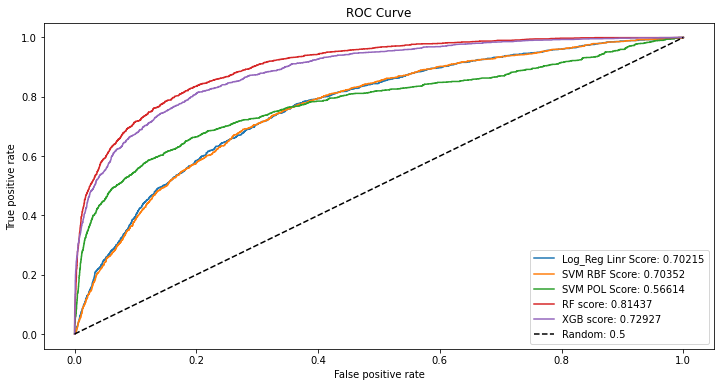

In [623]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_lin, tpr_log_lin, label = 'Log_Reg Linr Score: ' + str(round(auc_log_lin, 5)))
plt.plot(fpr_SVM_r, tpr_SVM_r, label = 'SVM RBF Score: ' + str(round(auc_SVM_r, 5)))
plt.plot(fpr_SVM_pol, tpr_SVM_pol, label = 'SVM POL Score: ' + str(round(auc_SVM_pol, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

## The purpose of this project is to help the bank retain the customers, who are likely to exit the bank or a service. We want a model which predicts whether a customer will churn or not, with high accuracy. The models with the best accuracies are SVM(polynomial kernel), Random Forest and XGBoost with 81.8%, 82.2%, 86.38% respectively. But since the data is imbalanced with a greater number of samples of retained customers, we will select a model with high recall so that we can minimize the number of customers churning. We see that Random Forest is the model with the highest recall score(0.73). Also, it has a decent precision and the highest AUC score (from ROC curve). Hence we will select Random Forest as the best model. 

# Conclusion

After proper inspection and evaluation, Random Forest Classifier seems to have performed the best. But, there is an imbalance of samples. A greater number of samples of churned customers is required to strike a balance between the churned and retained customers, for better prediction. Hence, the model must be retrained in the future with more balanced samples for better accuracy and precision. 